## Урок 10. Домашнее задание

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score

%matplotlib inline

In [2]:
with open("data/clustering.pkl", "rb") as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering["X"])
y = np.array(data_clustering["Y"])

In [7]:
model = KMeans(n_clusters=4, random_state=17).fit(X)

score = silhouette_score(X, model.labels_)
print(f"Silhouette 4 clusters: {score:.3f}")

model = KMeans(n_clusters=2, random_state=17).fit(X)

score = silhouette_score(X, model.labels_)
print(f"Silhouette 2 clusters: {score:.3f}")

Silhouette 4 clusters: 0.443
Silhouette 2 clusters: 0.447


2 clusters better than 4


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [8]:
model = KMeans(n_clusters=4, random_state=17).fit(X)

score = adjusted_mutual_info_score(y, model.labels_)
print(f"AMI 4 clusters: {score:.3f}")

model = KMeans(n_clusters=3, random_state=17).fit(X)

score = adjusted_mutual_info_score(y, model.labels_)
print(f"AMI 3 clusters: {score:.3f}")


AMI 4 clusters: 0.584
AMI 3 clusters: 0.610


3 clusters better that 4


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [13]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

In [11]:
data = pd.read_csv("data/7.10_clustering_hw.csv")
X = data.values[:,:-1]
y = data.values[:,-1]
print(X.shape, y.shape)

(300, 2) (300,)


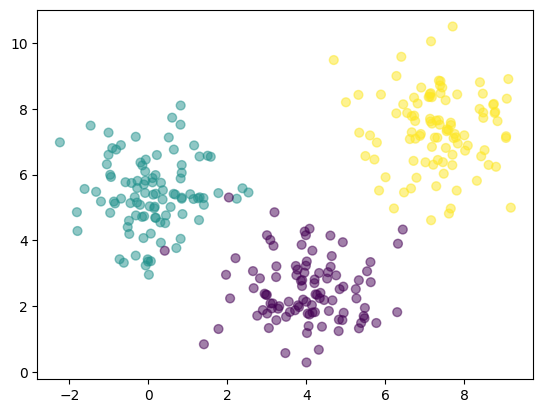

In [18]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, alpha=0.5)
plt.show()

cluster_num = 1, metric = 1105.8974
cluster_num = 2, metric = 663.5712
cluster_num = 3, metric = 374.6590
cluster_num = 4, metric = 354.2191
cluster_num = 5, metric = 330.0641
cluster_num = 6, metric = 311.8588
cluster_num = 7, metric = 285.3962
Best cluster num: 3


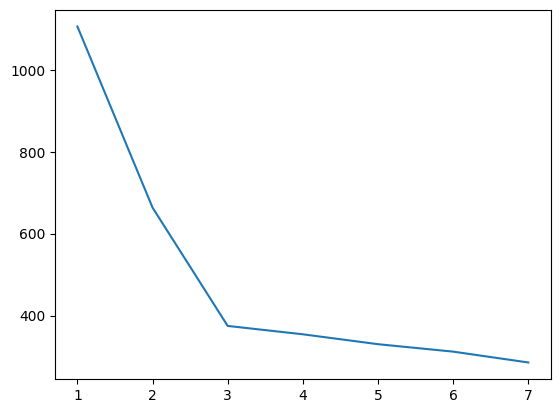

In [14]:
metrics = []
MAX_CLUSTERS = 7

for cluster_num in range(1, MAX_CLUSTERS + 1):
    k_means = KMeans(n_clusters=cluster_num, random_state=17).fit(X)
    centroids, labels = k_means.cluster_centers_, k_means.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1, -1)
        ).sum(axis=0)[0]
    print(f"{cluster_num = }, {metric = :.4f}")
    metrics.append(metric)
    
D = []
for i in range(len(metrics) - 1):
    d = abs(metrics[i+1] - metrics[i]) / abs(metrics[i] - metrics[i-1])
    D.append(d)
print(f"Best cluster num: {np.argmin(D) + 1}")

plt.plot(range(1, len(metrics) + 1), metrics)
plt.show()

[[5, 8], [0, 5], [4, 1]]: [2 1 0]


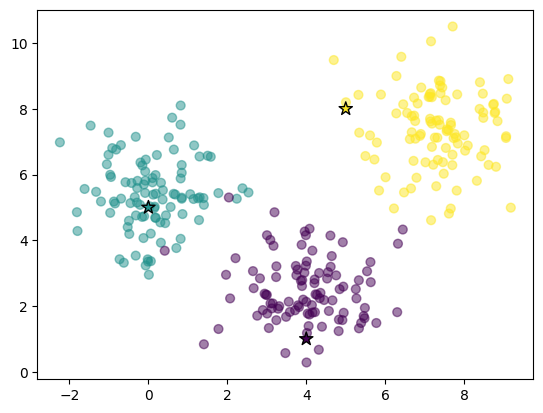

In [46]:
model = KMeans(n_clusters=3, random_state=17).fit(X)
valid_data = np.array([[5, 8], [0, 5], [4, 1]])
pred = model.predict(valid_data)
print(f"[[5, 8], [0, 5], [4, 1]]: {pred}")
plt.scatter(X[:,0], X[:,1], s=40, c=y, alpha=0.5)
plt.scatter(valid_data[:,0], valid_data[:,1], s=100, c=pred, marker="*", edgecolors="black")
plt.show()

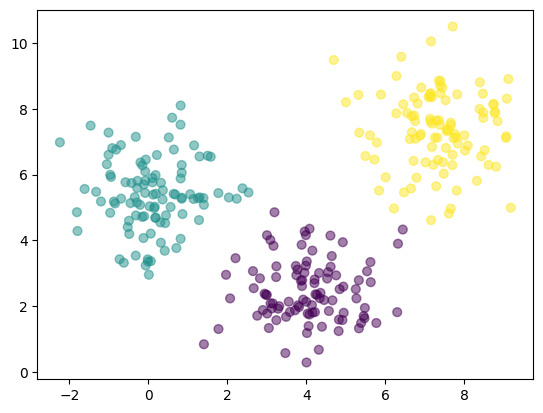

In [31]:
plt.scatter(X[:,0], X[:,1], s=40, c=model.predict(X), alpha=0.5)
plt.show()

In [32]:
score = adjusted_mutual_info_score(y, model.labels_)
print(f"AMI: {score:.3f}")

AMI: 0.970


In [41]:
model.predict([[4, 2]])

array([0], dtype=int32)

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)